In [14]:
%load_ext autoreload
%autoreload 2
import xarray as xr 
import xeofs as xe
import matplotlib.pyplot as plt
from src.configs import *
from src.regions import *

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [15]:
REGION = 'AFC'

In [16]:
vert_data = xr.open_dataset(merged_era5_var_file('w')).W
vert_data = vert_data.sel(afc_region().get_slices())
vert_data = (-1/9.81) * vert_data  # convert to mass flux, mf = -omega/g

In [17]:
model = xe.single.EOF(n_modes=10, center=True)
del model.attrs['solver_kwargs']
model.fit(vert_data, ('lat', 'lon', 'time'))

Text(0.5, 1.0, 'AFC EOFs')

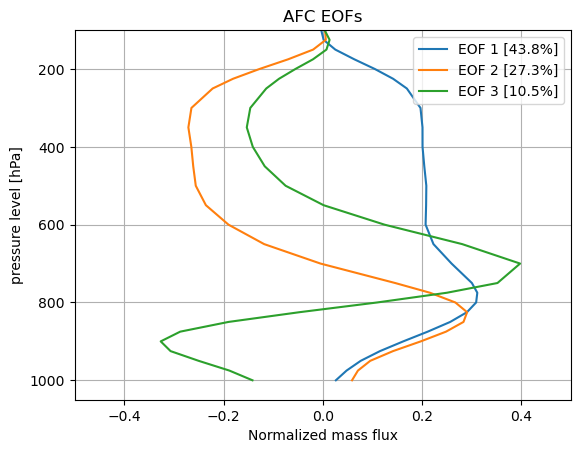

In [19]:
model.components().sel(mode=1).plot(
    y='level',
    label=f'EOF 1 [{100*model.explained_variance_ratio().sel(mode=1):.1f}%]'
)

model.components().sel(mode=2).plot(
    y='level',
    label=f'EOF 2 [{100*model.explained_variance_ratio().sel(mode=2):.1f}%]'
)
model.components().sel(mode=3).plot(
    y='level',
    label=f'EOF 3 [{100*model.explained_variance_ratio().sel(mode=3):.1f}%]'
)

plt.gca().invert_yaxis()
plt.xlim(-0.5, 0.5)
plt.ylim(None, 100)
plt.legend(loc='upper right')
plt.grid()
plt.xlabel('Normalized mass flux')
plt.title(f'{REGION} EOFs')

In [20]:
# Save output
out_dir = f'{project_root_dir()}/data'
eof_fname = out_dir + f'/{REGION}.massflux_EOFs.nc'
pc_fname = out_dir + f'/{REGION}.massflux_PCs.nc'
model.components().to_netcdf(eof_fname)
model.scores(normalized=False).to_netcdf(pc_fname)